In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [131]:
df = pd.read_csv('C:/Users/tapan/OneDrive/Desktop/CV data science projects/ML/diabetes.csv')

In [132]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [133]:
df.replace(0,np.nan,inplace=True)

In [134]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [135]:
df['Pregnancies'].replace(np.nan,0,inplace=True)

In [136]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [137]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [138]:
df['Outcome'].replace(np.nan,0,inplace=True)

In [139]:
100*df.isnull().sum()/len(df)

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [140]:
len(df)

768

In [141]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<AxesSubplot:>

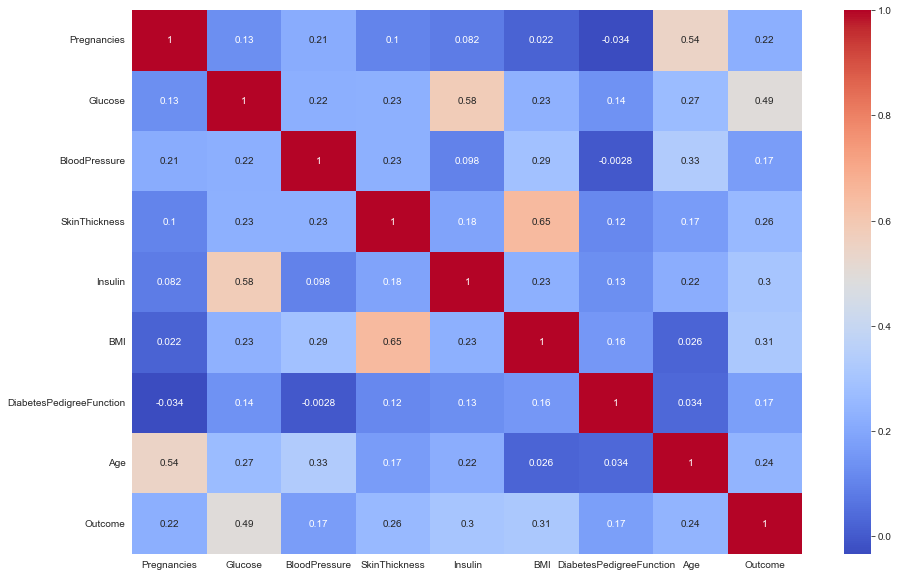

In [142]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

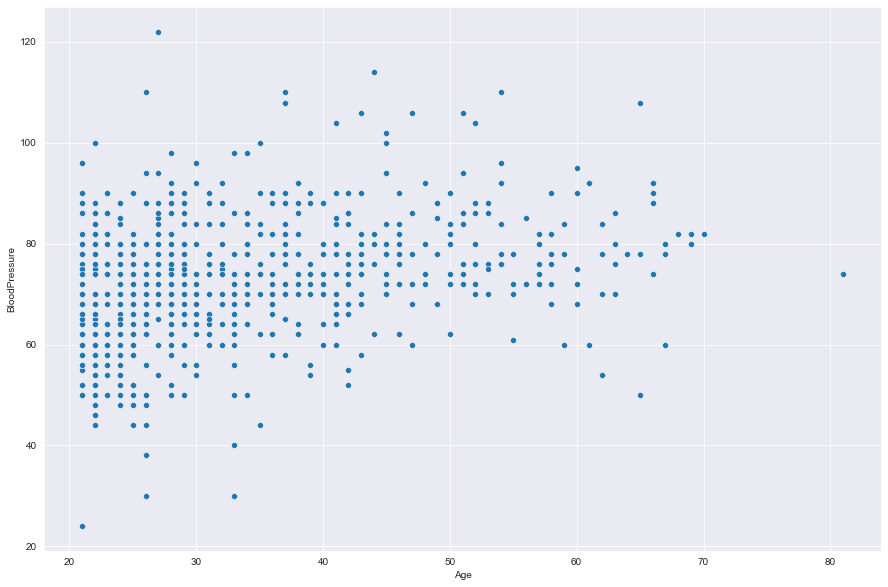

In [143]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.scatterplot(x='Age',y='BloodPressure',data=df)

In [144]:
blood_pressure_avg = df.groupby('Age').mean()['BloodPressure']


In [145]:
def fill_boold_pressure(Age,BloodPressure):
    if np.isnan(BloodPressure):
        return blood_pressure_avg[Age]
    else:
        return BloodPressure

In [146]:
df['blood_pressure'] = df.apply(lambda x:fill_boold_pressure(x.Age,x.BloodPressure),axis=1)

In [147]:
df.drop('BloodPressure',axis=1,inplace=True)

In [148]:
df.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,blood_pressure
0,6.0,148.0,35.0,NaN,33.6,0.627,50,1.0,72.0
1,1.0,85.0,29.0,NaN,26.6,0.351,31,0.0,66.0
2,8.0,183.0,NaN,NaN,23.3,0.672,32,1.0,64.0
3,1.0,89.0,23.0,94.0,28.1,0.167,21,0.0,66.0
4,0.0,137.0,35.0,168.0,43.1,2.288,33,1.0,40.0


In [149]:
df['blood_pressure']=df['blood_pressure'].replace(np.nan,df['blood_pressure'].dropna().mean())

In [150]:
df.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,blood_pressure
0,6.0,148.0,35.0,NaN,33.6,0.627,50,1.0,72.0
1,1.0,85.0,29.0,NaN,26.6,0.351,31,0.0,66.0
2,8.0,183.0,NaN,NaN,23.3,0.672,32,1.0,64.0
3,1.0,89.0,23.0,94.0,28.1,0.167,21,0.0,66.0
4,0.0,137.0,35.0,168.0,43.1,2.288,33,1.0,40.0


In [151]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
blood_pressure                0
dtype: int64

In [152]:
df.corr()['SkinThickness']

Pregnancies                 0.100239
Glucose                     0.228043
SkinThickness               1.000000
Insulin                     0.184888
BMI                         0.648214
DiabetesPedigreeFunction    0.115016
Age                         0.166816
Outcome                     0.259491
blood_pressure              0.227241
Name: SkinThickness, dtype: float64

<AxesSubplot:xlabel='BMI', ylabel='SkinThickness'>

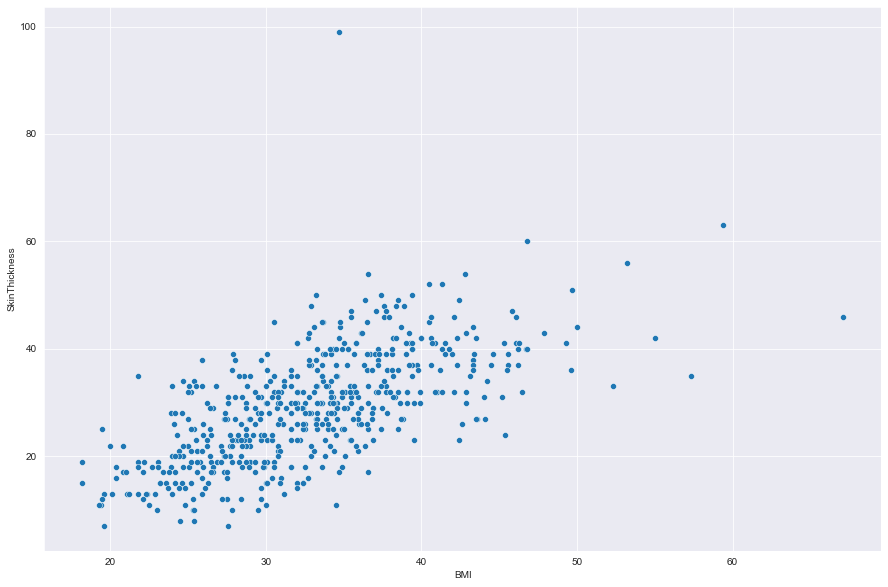

In [153]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.scatterplot(x='BMI',y='SkinThickness',data=df)

In [154]:

from sklearn.linear_model import LinearRegression


In [155]:
df['SkinThickness'].replace(np.nan,0,inplace=True)
df['BMI'].replace(np.nan,0,inplace=True)

In [156]:
lm = LinearRegression()
lm.fit(df[['BMI']],df['SkinThickness'])

LinearRegression()

In [157]:
BMI_ARrry = np.array(df[df['SkinThickness'] == 0 ]['BMI'])
BMI_ARrry=BMI_ARrry.reshape(227,1)

In [158]:
predication = lm.predict(BMI_ARrry)

In [159]:
j = 0
Skin_thickness = []
for i in df['SkinThickness']:
       if i == 0:
            i = predication[j]
            j = j+1
       Skin_thickness.append(i)
           
       
    

In [160]:
df['Skin_thickness'] = Skin_thickness

In [161]:
df.drop('SkinThickness',axis=1,inplace=True)

In [162]:
df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,blood_pressure,Skin_thickness
0,6.0,148.0,NaN,33.6,0.627,50,1.0,72.0,35.000000
1,1.0,85.0,NaN,26.6,0.351,31,0.0,66.0,29.000000
2,8.0,183.0,NaN,23.3,0.672,32,1.0,64.0,13.631916
3,1.0,89.0,94.0,28.1,0.167,21,0.0,66.0,23.000000
4,0.0,137.0,168.0,43.1,2.288,33,1.0,40.0,35.000000


In [163]:
Skin_thickness = []
for i in df['Skin_thickness']:
    if i < 0 :
        i = df['Skin_thickness'].mean()
    Skin_thickness.append(i)

In [164]:
df['Skin_thickness'] = Skin_thickness

In [165]:
df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,blood_pressure,Skin_thickness
0,6.0,148.0,NaN,33.6,0.627,50,1.0,72.0,35.000000
1,1.0,85.0,NaN,26.6,0.351,31,0.0,66.0,29.000000
2,8.0,183.0,NaN,23.3,0.672,32,1.0,64.0,13.631916
3,1.0,89.0,94.0,28.1,0.167,21,0.0,66.0,23.000000
4,0.0,137.0,168.0,43.1,2.288,33,1.0,40.0,35.000000


In [166]:
df

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,blood_pressure,Skin_thickness
0,6.0,148.0,NaN,33.6,0.627,50,1.0,72.0,35.000000
1,1.0,85.0,NaN,26.6,0.351,31,0.0,66.0,29.000000
2,8.0,183.0,NaN,23.3,0.672,32,1.0,64.0,13.631916
3,1.0,89.0,94.0,28.1,0.167,21,0.0,66.0,23.000000
4,0.0,137.0,168.0,43.1,2.288,33,1.0,40.0,35.000000
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,180.0,32.9,0.171,63,0.0,76.0,48.000000
764,2.0,122.0,NaN,36.8,0.340,27,0.0,70.0,27.000000
765,5.0,121.0,112.0,26.2,0.245,30,0.0,72.0,23.000000
766,1.0,126.0,NaN,30.1,0.349,47,1.0,60.0,19.033178


In [167]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
blood_pressure                0
Skin_thickness                0
dtype: int64

In [168]:
df.corr()['Insulin']

Pregnancies                 0.082171
Glucose                     0.581186
Insulin                     1.000000
BMI                         0.228328
DiabetesPedigreeFunction    0.130395
Age                         0.220261
Outcome                     0.303454
blood_pressure              0.098272
Skin_thickness              0.184888
Name: Insulin, dtype: float64

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

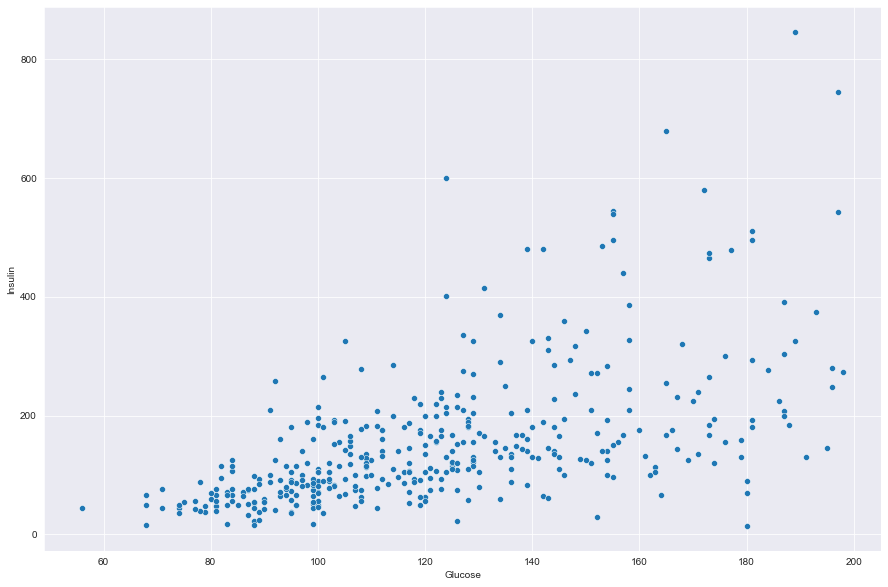

In [169]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.scatterplot(x='Glucose',y='Insulin',data=df)

In [170]:
df['Insulin'].replace(np.nan,0,inplace=True)
df['Glucose'].replace(np.nan,0,inplace=True)

In [171]:
lm1 = LinearRegression()
lm1.fit(df[['Glucose']],df['Insulin'])

LinearRegression()

In [172]:
Glucose_ARrry = np.array(df[df['Insulin'] == 0 ]['BMI'])
Glucose_ARrry.shape

(374,)

In [173]:

Glucose_ARrry=Glucose_ARrry.reshape(374,1)

In [174]:
predication1 = lm1.predict(Glucose_ARrry)

In [175]:
j = 0
Insulin = []
for i in df['Insulin']:
       if i == 0:
            i = predication1[j]
            j = j+1
       Insulin.append(i)
           
       

In [176]:
df['Insulin'] = Insulin


In [177]:
df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,blood_pressure,Skin_thickness
0,6.0,148.0,-24.461899,33.6,0.627,50,1.0,72.0,35.000000
1,1.0,85.0,-32.822442,26.6,0.351,31,0.0,66.0,29.000000
2,8.0,183.0,-36.763840,23.3,0.672,32,1.0,64.0,13.631916
3,1.0,89.0,94.000000,28.1,0.167,21,0.0,66.0,23.000000
4,0.0,137.0,168.000000,43.1,2.288,33,1.0,40.0,35.000000


In [178]:
Insulin = []
for i in df['Insulin']:
    if i < 0 :
        i = df['Insulin'].mean()
    Insulin.append(i)
df['Insulin'] = Insulin

In [179]:
df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,blood_pressure,Skin_thickness
0,6.0,148.0,66.341836,33.6,0.627,50,1.0,72.0,35.000000
1,1.0,85.0,66.341836,26.6,0.351,31,0.0,66.0,29.000000
2,8.0,183.0,66.341836,23.3,0.672,32,1.0,64.0,13.631916
3,1.0,89.0,94.000000,28.1,0.167,21,0.0,66.0,23.000000
4,0.0,137.0,168.000000,43.1,2.288,33,1.0,40.0,35.000000


In [180]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())

In [181]:
df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,blood_pressure,Skin_thickness
0,6.0,148.0,66.341836,33.6,0.627,50,1.0,72.0,35.000000
1,1.0,85.0,66.341836,26.6,0.351,31,0.0,66.0,29.000000
2,8.0,183.0,66.341836,23.3,0.672,32,1.0,64.0,13.631916
3,1.0,89.0,94.000000,28.1,0.167,21,0.0,66.0,23.000000
4,0.0,137.0,168.000000,43.1,2.288,33,1.0,40.0,35.000000


C:\Users\tapan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tapan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tapan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tapan\anaconda3\lib\site-pac

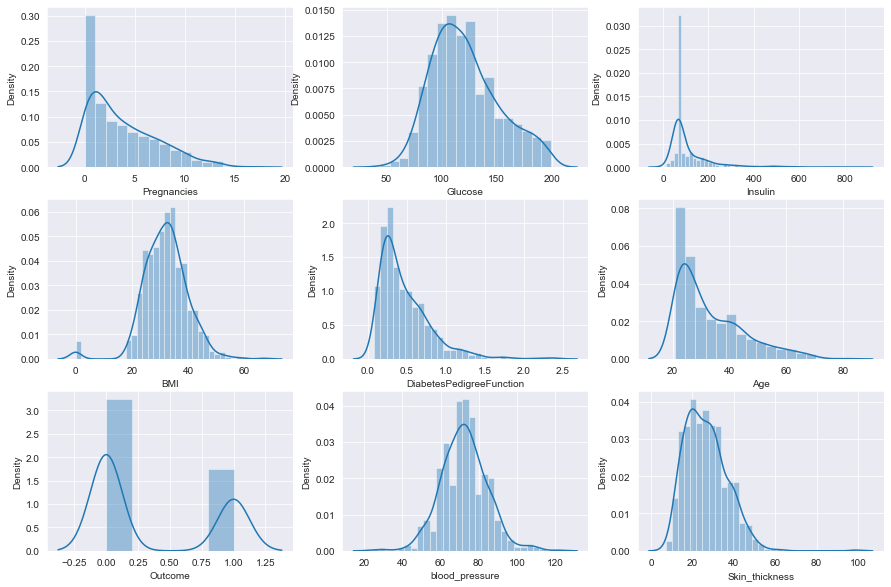

In [182]:

plt.figure(figsize=(15,10))
pn = 1
for i in df:
    plt.subplot(3,3,pn)
    sns.distplot(df[i])
    pn = pn +1

In [183]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

C:\Users\tapan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tapan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tapan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\tapan\anaconda3\lib\site-pac

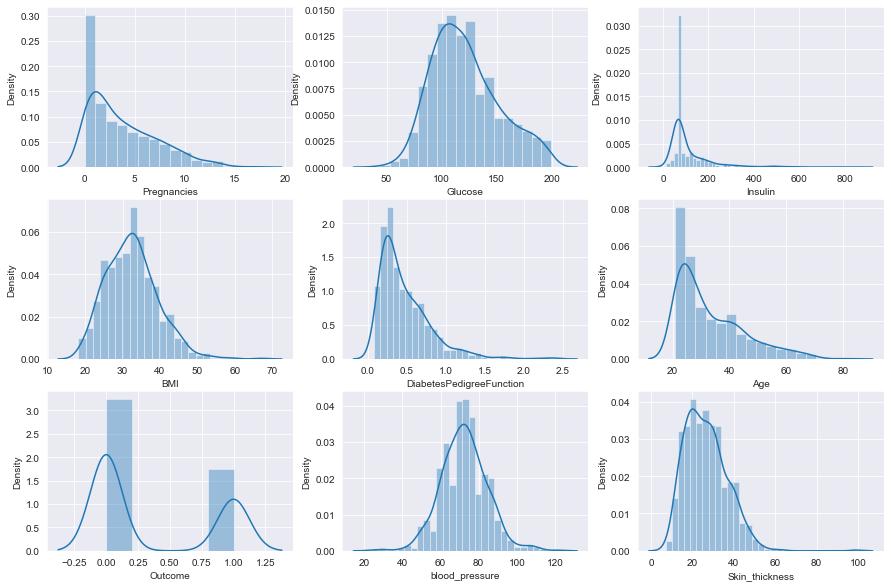

In [184]:
plt.figure(figsize=(15,10))
pn = 1
for i in df:
    plt.subplot(3,3,pn)
    sns.distplot(df[i])
    pn = pn +1

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score

In [186]:
scalar = StandardScaler()

In [187]:
df.columns

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age', 'Outcome', 'blood_pressure', 'Skin_thickness'],
      dtype='object')

In [188]:
X = df[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age', 'blood_pressure', 'Skin_thickness']]

In [189]:
y = df['Outcome']

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [191]:
X_train = scalar.fit_transform(X_train)

In [192]:
X_test = scalar.transform(X_test)

In [193]:
svc = SVC()

# Using Grid SearchCV

In [194]:
from sklearn.model_selection import GridSearchCV

In [195]:
parameter = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [196]:
clf = GridSearchCV(estimator=svc,param_grid=parameter,cv=3)
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [197]:
clf.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [198]:
Model = clf.best_estimator_

# Testing of Model

In [199]:
Prediction = Model.predict(X_test)


# Confusion Matrix

In [203]:
mat = confusion_matrix(Prediction,y_test)

<AxesSubplot:>

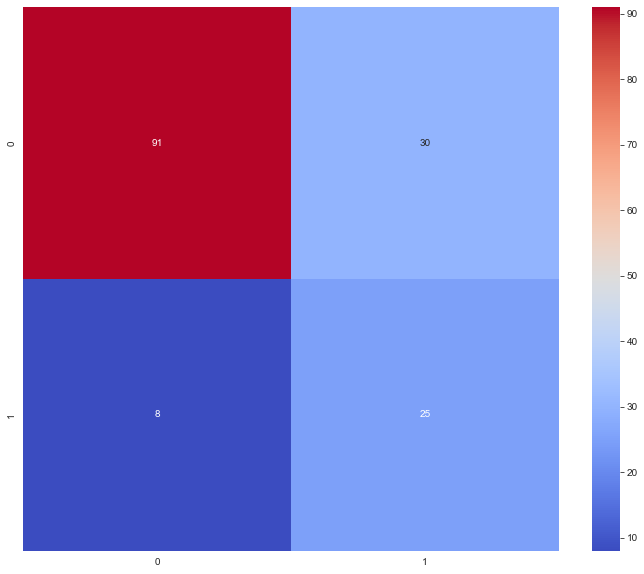

In [209]:
plt.figure(figsize=(12,10))
sns.heatmap(mat, annot=True,cmap='coolwarm')

In [201]:
print(classification_report(Prediction,y_test))

              precision    recall  f1-score   support

         0.0       0.92      0.75      0.83       121
         1.0       0.45      0.76      0.57        33

    accuracy                           0.75       154
   macro avg       0.69      0.75      0.70       154
weighted avg       0.82      0.75      0.77       154



# AUC

In [202]:
auc = roc_auc_score(y_test, Prediction)
auc

0.686868686868687

# ROC

In [126]:
fpr, tpr, thresholds = roc_curve(y_test, Prediction)

In [127]:
 thresholds

array([2., 1., 0.])

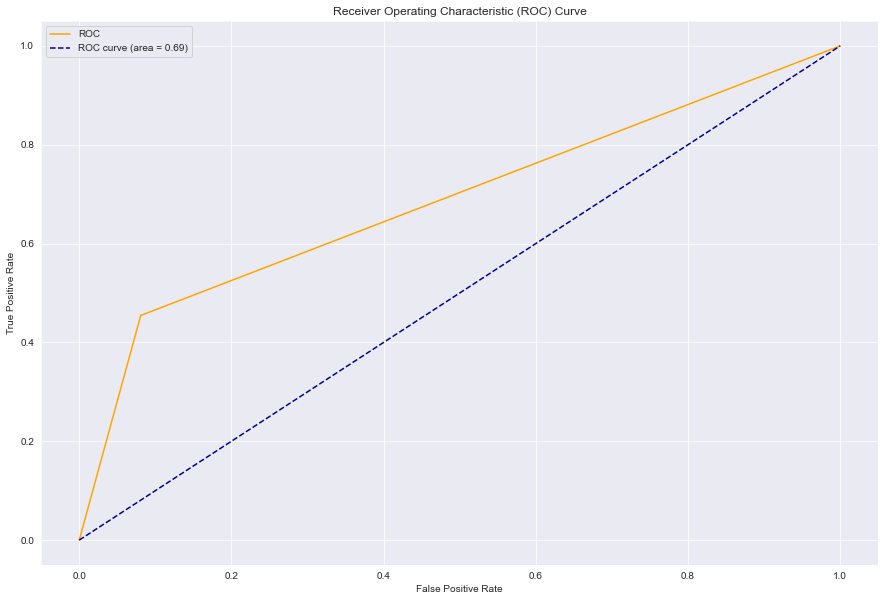

In [128]:
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()